# ML-3 Обучение с учителем. Классификация
###  Содержание <a class="anchor" id=0></a>
- [1. Введение](#1)
- [2. Введение в обучение без учителя. Базовая класетизация](#2)
- [3. Метрики](#3)
- [4. Иерархическая кластеризация](#4)
- [5. ЕМ-алгоритмы кластеризации](#5)
- [6. Спектральная классификация](#6)
- [7. Кластеризация на основе плотности](#7)
- [8. Визуализация результатов кластеризации](#8)
- [9. PCA и t-SNE, или зачем понижать размерность](#9)
- [10. Практика](#10)

# 1. Введение <a class="anchor" id=1></a>

[к содержанию](#0)

<img src=ml_4_img1.png width=800>

При обучении с учителем у нас всегда есть размеченные данные, т. е. **«правильные ответы»**. В данном случае мы предсказываем бинарные значения (например, уйдёт клиент от сотового оператора или нет) или точные значения (например, прибыль, которую получит магазин). Строить модели обучения с учителем вы уже умеете.

>Однако в реальной жизни данные зачастую приходят неразмеченными. Также не всегда есть возможность размечать их вручную, так как это может быть долго и/или дорого. Например, вы можете быть владельцем интернет-магазина и собирать данные о покупках, но в ваших данных никто не ставит отметки о лояльности клиентов. Или перед вами может стоять задача отделить рентгеновские снимки, на которых есть опухоль в лёгких, от снимков, на которых опухоли нет. Пока врач вручную не разметит данные, правильных ответов для обучения модели не будет.

Если размеченных данных нет, невозможно использовать подходы обучения с учителем. В таком случае на помощь приходят **методы обучения без учителя**.

### К обучению без учителя можно отнести:

* `Методы кластеризации`. Они позволяют разделить объекты на группы, внутри которых объекты максимально похожи друг на друга.
* `Методы понижения размерности`. С их помощью можно уменьшить число признаков, которые характеризуют объект. Обычно количество признаков уменьшают до двух-трёх для дальнейшей визуализации данных или использования при обучении моделей.
* `Методы ассоциации`. Они используются для того, чтобы найти правила и законы, по которым существует последовательность действий.

### КАКИЕ ПРОБЛЕМЫ МОЖНО РЕШАТЬ С ПОМОЩЬЮ МЕТОДОВ ОБУЧЕНИЯ БЕЗ УЧИТЕЛЯ?

Используя подходы, которые мы изучим в данном модуле, мы сможем лучше понимать данные, с которыми предстоит работать, например **разделять данные на группы**, которые схожи по каким-то признакам.

* Данные до кластеризации можно сравнить с фруктовым салатом, состав которого нам нужно понять. Используя методы кластеризации и визуализацию, мы можем понять, из чего состоят наши данные (наш «салат»):

<img src=ml_4_img2.png width=800>

* Если данных, с которыми вы работаете, много, то методы машинного обучения без учителя позволяют **уменьшить их объём**, убрав схожие данные и оставив только несколько представителей различных групп.

* Если разработанная модель плохо или долго обучается, причина может быть в том, что у объекта слишком много признаков. Методы уменьшения размерности помогают **уменьшить количество признаков**, которые характеризуют объект, и ускорить обучение модели.

Например, данные, которые изначально описывались тремя признаками (куб на рисунке ниже), мы можем описать и двумя признаками, спроецировав их на плоскость. Далее мы можем спроецировать полученный результат на одну ось и описывать объекты уже одним признаком:

<img src=ml_4_img3.png width=800>

* Некоторые методы кластеризации помогают **найти выбросы в данных**.

* Методы ассоциации позволяют **создавать шаблоны**. Это может помочь правильно расставить товары на полках в магазине или спрогнозировать продукты, которые могут купить вместе (например, если человек купил творог, то, возможно, ему будет нужна и сметана).

Таким образом, методы обучения без учителя решают весьма разнообразные задачи и могут помочь Data Science-специалисту в работе.

# 2. Введение в обучение без учителя. Базовая класетизация <a class="anchor" id=2></a>

[к содержанию](#0)

>Представьте, что вы работаете дата-сайентистом и получаете задачу по маркетинговому исследованию клиентов. Вам необходимо выделить группы покупателей по степени интереса к продукту и по сумме, которую они тратят.

### Как решить данную задачу?

**Обучение с учителем здесь не подходит**, так как у нас нет правильных ответов о степени заинтересованности покупателей в продукте.

Однако не спешите расстраиваться — на помощь придёт обучение без учителя, а именно кластеризация.

Кластеризация позволяет разбить объекты на группы, которые называются `кластерами`.

<img src=ml_4_img4.png>

Также у каждого кластера есть `центроид`.

`Центроид` — это центр масс кластера, или среднее значение координат объектов кластера.

<img src=ml_4_img5.png>

### Как найти этот `центроид`?

Допустим, у нас есть маленький кластер, состоящий из четырёх точек. Каждая точка описывается только одним свойством — `x1`, рост человека:

* Человек №1 - `x1 = 180`
* Человек №2 - `x2 = 170`
* Человек №3 - `x3 = 181`
* Человек №4 - `x4 = 160`

Тогда для нахождения центроида мы берём все значения по оси `x` и считаем среднее:

`x1(центроид кластера) = (180+170+181+160) / 4 = 172`

Что делать, если данные описываются двумя свойствами, например, рост (`x1`) и вес (`x2`)?

* Человек №1 - `x1 = 180` - `x2 = 70`
* Человек №2 - `x2 = 170` - `x2 = 60`
* Человек №3 - `x3 = 181` - `x2 = 65`
* Человек №4 - `x4 = 160` - `x2 = 45`

Для нахождения координат центроида мы последовательно находим:

`x1(центроид x1) = (180+170+181+160) / 4 = 172`
`x2(центроид x2) = (70+60+65+45) / 4 = 60`

**Таким образом, координаты центроида — (172, 60)**.


## АЛГОРИТМ `K-MEANS`

Рассмотрим один из наиболее популярных методов кластеризации — `k-means`.

Данный алгоритм был разработан ещё в 1950-х, но благодаря скорости своей работы он до сих пор остаётся востребованным.

>**Идея алгоритма** состоит в том, что он разбивает множество элементов векторного пространства на заранее заданное пользователем число кластеров, а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.

Математически это выглядит следующим образом: 

<img src=ml_4_img6.png>


Только что мы рассмотрели, как работает алгоритм для одномерного случая (если есть только один признак, описывающий объект). Ниже вы можете увидеть, как работает алгоритм для двухмерного случая (когда объект описывается двумя признаками).

<img src=ml_4_gif.gif>

Если объект описывается тремя и более признаками, поиск кластеров идёт в `m`-мерном пространстве признаков. Однако такую работу алгоритма довольно сложно визуализировать.

Рассмотренный нами алгоритм был основан на центроидах: мы находили центры кластеров и присваивали объекты к ближайшему центроиду кластера.

На самом деле центры кластера можно определять разными способами. В зависимости от этого выделяется **несколько вариаций алгоритма `k-means`**:

<img src=ml_4_img7.png>

Теперь мы знаем, как работает алгоритм `k-means`, но не хотелось бы реализовывать его с нуля. Для того чтобы запустить алгоритм кластеризации `k-means`, нам нужна библиотека `sklearn` и модуль KMeans.

Что необходимо для запуска?

* Обязательно задать количество кластеров, на которые необходимо разделить данные.
* Данные, т. е. параметры объектов (`x1`), которые мы будем передавать в виде матрицы наблюдений X.

После этого можно запустить алгоритм и для каждого объекта в данных получить метку, к какому кластеру этот объект относится:

In [ ]:
# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = df[["x1", "x2", "x3"]]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

Таким образом, мы обучили модель кластеризации. Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из `df2`, то мы просто воспользуемся методом `predict`:

In [ ]:
X_new = df2[["x1", "x2", "x3"]]
k_means.predict(X_new)

Чтобы запустить алгоритм, необходимо задать параметры кластеризации:

`n_clusters` — количество кластеров. По умолчанию — `8`.
`init` — способ инициализации центроидов. Есть две опции: `random` (выбирает центроиды случайным образом) и `k-means++` (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется `k-means++`.
`n_init` — количество случайных инициализаций алгоритма `k-means`. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия `k-means`. По умолчанию `n_init = 10`.
`max_iter` — максимальное количество итераций алгоритма `k-means` при одном запуске. По умолчанию — `300`.
`random_state` — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

Теперь попробуем применить полученные знания на практике.

# Можно посмотреть файл `dst3-ml4-2_clusterization.ipynb`



In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('pokemon.zip')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


c:\Users\AubakirovMA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

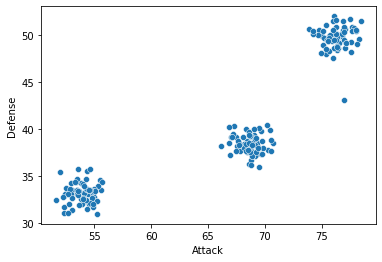

In [2]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(df.Attack, df.Defense)

Из получившегося графика непонятно, сколько кластеров должно быть и как их выбрать. Попробуем разделить данные на три кластера.

Инициализируем алгоритм `k-means`. При инициализации зададим параметры моделирования:

* `n_clusters` — количество кластеров;
* `init` — стратегия кластеризации;
* `n_init` — количество запусков алгоритма `k-means`;
* `random_state` — чтобы результаты воспроизводились от запуска к запуску.

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

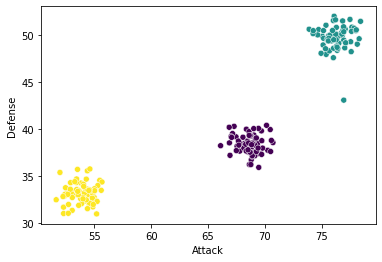

In [3]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(df.Attack, df.Defense, c=predictions)

В данном случае видно, что данные хорошо делятся на три кластера, а также есть одна точка-выброс. 

Попробуем увеличить количество кластеров до четырёх, чтобы вынести выброс в отдельный кластер:

Как видим, «отделить» выброс от других данных не получается: `k-means` не умеет обрабатывать выбросы.

>В данном случае мы проводили кластеризацию по двум признакам. Мы сделали это для того, чтобы можно было визуализировать результаты. Для кластеризации можно использовать и более двух признаков, однако в таком случае кластеризация будет проходить в `n`-мерном пространстве (для трёх признаков пространство будет трёхмерным), и визуализировать результаты будет непросто.

В трёхмерном и другом `n`-мерном случае кластеризация запускается следующим образом:

In [4]:
# добавляем третий признак — скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

## НЕДОСТАТКИ АЛГОРИТМА K-MEANS

* Необходимо заранее знать, на сколько кластеров мы хотим разделить данные. В учебных примерах известно, каким должно быть `k`, и определить это значение довольно легко. В реальности данные сложнее и трудно заранее предугадать, сколько кластеров мы хотим получить.

* Очевидно, что для объектов, которые в равной степени принадлежат к разным кластерам, алгоритм `k-means` будет отрабатывать плохо.

* Алгоритм чувствителен к выбросам в данных, так как выбросы сильно искажают местонахождение центроида кластера.

Например, на картинке ниже зелёная точка справа — явный выброс. Но получилось так, что этот выброс находится ближе всего к зелёному кластеру, поэтому выброс был отнесён к нему. При подсчёте центроида для зелёного кластера появится искажение, так как выброс сильно на это повлияет:

<img src=ml_4_img8.png>

* Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы.

Например, если данные распределены, как на левом и среднем рисунках ниже, алгоритм `k-means` будет проводить кластеризацию некорректно и выделять два довольно странных кластера (синий и оранжевый). На правом рисунке изображены кластеры удлинённой формы, и для них `k-means` также отрабатывает плохо. Так происходит потому, что алгоритм ищет ближайших соседей и поэтому выделяет зелёным две нижних части двух разных кластеров, считая их ближайшими соседями.

<img src=ml_4_img9.png>

* Так как в самом начале работы алгоритма центроиды определяются случайным образом, результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров.


## ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО K ДЛЯ АЛГОРИТМА `K-MEANS`

Рассмотрим, как побороть один из существенных недостатков алгоритма, а именно — как подобрать оптимальное количество кластеров.

>Для этого можно использовать несколько способов: метод локтя (`elbow plot`), статистику разрыва (`Gap Statistic Method`), коэффициент силуэта (`Average Silhouette Method`). Мы рассмотрим метод локтя и коэффициент силуэта.

**Начнём с метода локтя**.

Данный метод позволяет найти такое оптимальное число кластеров, чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных.

Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется недообученной (`underfitting`).

Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется переобученной (`overfitting`).

Чтобы определить оптимальное количество кластеров, используя метод локтя, необходимо нарисовать график, на котором по оси `x` будет отложено количество кластеров, а по оси `y` — инерция.

>**Инерция** — это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера.

<img src=ml_4_img10.png>

Когда инерция быстро снижается, область считается **недообученной**, а далее, после «перегиба», идёт очень медленное снижение инерции, и область считается **переобученной**.

<img src=ml_4_img11.png>

Таким образом, нам необходимо построить график и найти тот самый перегиб с оптимальным количеством кластеров. В данном случае оптимальное количество кластеров равно 4.

Теперь реализуем это в виде кода. Нам нужно посчитать значение инерции для кластеризаций с разным количеством кластеров. Для этого напишем функцию `get_inertia`, которая будет принимать данные и количество кластеров и возвращать значение инерции:

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


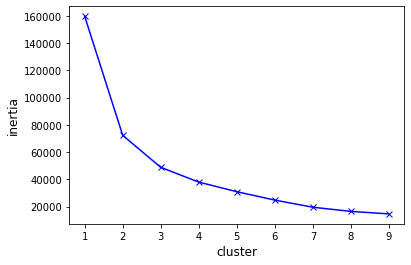

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

Как можно заметить из графика, на сгибе `k=3`. Значит, оптимальное количество кластеров, подобранное с помощью алгоритма локтя, равняется трём. Значения `k от 1 до 2` — **недообученная** область, а после значения 3 идёт **переобучение**.

>Таким образом, метод локтя — это довольно простой метод, основанный на учёте евклидова расстояния между объектами кластера и центроидами.

Однако изгиб на графике также может быть представлен нечётко:

## Однако изгиб на графике также может быть представлен нечётко:

Как быть в таком случае? Какое оптимальное количество кластеров выбрать?

Если вдруг в ходе работы вы встречаете график, на котором невозможно найти «локоть», на помощь придёт `коэффициент силуэта`.

График силуэта, в отличие от графика локтя, имеет пиковый характер, поэтому его проще визуализировать и анализировать.

На графике ниже по оси `x` отложено количество кластеров, а по оси `y` — значение коэффициента силуэта. Можно отчётливо увидеть, что пик графика приходится на количество кластеров, равное 3:

<img src=ml_4_img12.png width=600>

Коэффициент силуэта показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров.

Силуэт варьируется от `-1 до +1`: чем выше значение, тем больше объекты похожи на объекты своего кластера и меньше похожи на объекты соседних кластеров.

Если силуэт равен `1`, это означает, что кластеры хорошо разделены между собой и имеют высокую плотность внутри себя, например, такая кластеризация, где данные чётко разделены на три группы:

<img src=ml_4_img13.png width=600>

Возьмём красный кластер. Для объекта из красного кластера рассчитаем расстояние до каждого объекта в этом кластере (пусть это будет `a`). Далее для красного кластера найдём ближайший кластер. Посчитаем расстояние от того же объекта из красного кластера  до каждого объекта зелёного кластера (примем это значение за `b`).

Для каждой точки датасета рассчитывается значение силуэта:

`s_i = (b_i - a_i) / max(a_i,b_i)`

Далее рассчитывается среднее значение силуэта для всего датасета.

Посчитаем силуэт, используя `sklearn`:

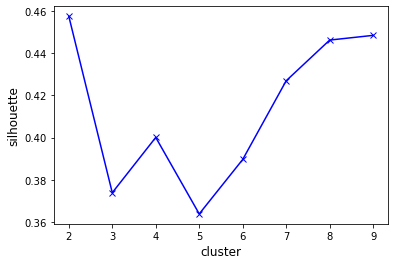

In [7]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

In [8]:
data = pd.read_csv('values_from_the_instrument.zip')
data.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


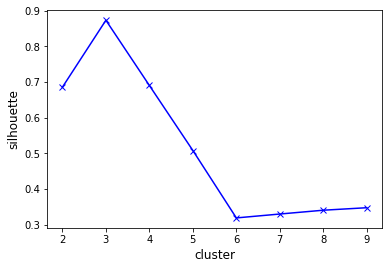

In [11]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, data))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

# 3. Метрики <a class="anchor" id=3></a>

[к содержанию](#0)

Допустим, мы разделили кошек и собак на два кластера: в каждом из кластеров находятся либо только кошки, либо только собаки. Но может получиться так, что в ходе кластеризации мы разделим одинаковых собак по разным кластерам или кошки с собаками перемешаются, как на рисунке ниже:

<img src=ml_4_img14.png width=600>

Поэтому было бы хорошо как-то оценивать, не создали ли мы лишние кластеры или одинаковые ли объекты в нашем кластере. В этом нам помогут метрики, которые мы рассмотрим далее.

Чтобы понять, правильно ли объекты распределились по кластерам, необходимо знать, в каких кластерах должны быть объекты.

>Ранее мы говорили, что кластеризация относится к методу машинного обучения без учителя и применяется, **когда нет размеченных данных**, а значит мы не знаем правильных ответов. Однако иногда размеченные данные всё же есть. В таком случае мы можем провести дополнительный анализ получившихся кластеров.

Существует ряд метрик, которые можно подсчитать, если данные размечены. Мы рассмотрим четыре метрики, которые больше всего помогут нам при анализе результатов кластеризации:

## 1. ОДНОРОДНОСТЬ КЛАСТЕРОВ (`HOMOGENEITY SCORE`)

Данная метрика, как и три последующих, может применяться, **только когда есть размеченные данные**.

>Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру.

Значение метрики уменьшается, если объединить два разных кластера, которые содержат непохожие объекты.

Например, нам нужно распределить кошек и собак по разным кластерам. В первом случае нам это удалось, а во втором одна собака «убежала» к кошкам, одна кошка — к собакам, и животные перемешались:

<img src=ml_4_img15.png width=600>

Таким образом, во втором случае в кластере оказались разные животные, поэтому однородность снизилась.

>B первом кластере метрика однородности будет максимальной и равна `1`, во втором значение однородности будет меньше, так как животные немного перемешались. Если бы кластер был максимально неоднородный, значение метрики было бы равно `0`.

Теперь посмотрим, как рассчитать метрику однородности в `sklearn`:

In [12]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

1.0


Во втором случае мы получаем метрику, равную `1`, хотя предсказывали совершенно противоположный результат. Почему так получилось?

Допустим, наши `0` и `1` — это номера кластеров, в которых находятся кошки и собаки:

<img src=ml_4_img16.png width=600>

`labels_true` — это реальные значения: в кластере `0` — собаки, в кластере `1` — кошки. В первый раз мы предсказали, что в кластере `0` находятся две собаки, а в кластере `1` — две кошки. Метрика однородности равна `1`, так как внутри кластеров разные объекты и наши ответы полностью совпали с `labels_true`.

Во втором случае, казалось бы, будет неверно, если в кластере `0` будут кошки, а в кластере `1` — собаки. Но, судя по составу кластеров, кошки и собаки не перемешались, поэтому однородность кластеров будет равна `1`.

Рассмотрим метрику однородности на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

<img src=ml_4_img17.png width=600>

In [14]:
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

1.0


Вы можете удивиться, что во втором случае метрика равна 1, но это нормально: хоть мы и разделили данные на большее количество кластеров, внутри кластеров данные остались однородными.

## 2. ПОЛНОТА КЛАСТЕРА (`COMPLETENESS SCORE`)

Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере.

Значение метрики уменьшается, если эталонный кластер разделить на части. Например, если кластер, в котором находятся только собаки, разделить на два более мелких кластера, то метрика полноты у такой кластеризации будет меньше:

<img src=ml_4_img18.png width=600>

На рисунке выше `c` — это `completeness`, или полнота.

При максимальном заполнении кластеров схожими объектами полнота равняется `1` (когда есть один большой кластер со всеми собаками), при минимальном заполнении — `0`.

In [15]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])

1.0

Рассмотрим метрику полноты на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

<img src=ml_4_img17.png width=600>

Во втором случае третий кластер оказался неполным, так как предсказано, что половина объектов принадлежит к третьему кластеру, а другая половина — к четвёртому. Однако два других кластера предсказаны правильно, поэтому метрика полноты меньше 1, но всё же её значение не такое низкое.

## 3. V-МЕРА (`V-MEASURE`)

Эта метрика — комбинация метрик полноты и однородности.

>Значение `V-меры` варьируется `от 0 до 1`. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

`V-мера` рассчитывается по формуле:

<img src=ml_4_img19.png>

>Метрику однородности кластера при кластеризации можно сравнить с метрикой `precision` из задачи классификации: метрика однородности также показывает, насколько точно мы предсказали, к какому классу принадлежит объект. Метрика полноты так же, как метрика `recall` из задачи классификации, показывает, насколько мы наполнили кластеры теми объектами, которые должны принадлежать к данным кластерам.

Данную метрику можно вычислять, когда одновременно важны и наполненность кластеров, и их однородность.

Допустим, мы разделили данные следующим образом:

<img src=ml_4_img20.png>

Если бы мы считали метрику однородности кластеров, то она была бы равна `1`, так как кластеры однородны и собаки и кошки внутри них не перемешаны. Но очевидно, что кластеризация неидеальна: вместо одного кластера с собаками у нас целых два. Поэтому если бы мы неправильно выбрали метрику (считали бы однородность) для определения качества кластеризации, то сделали бы неверные выводы. Но если мы будем считать `V-меру`, то будем одновременно учитывать оба фактора (полноту и однородность кластеров). Если же какой-то из факторов для нас важнее, мы можем изменять значение `beta`, придавая больший вес однородности кластера или полноте.

Посчитаем `V-меру` для двух случаев кластеризации датасета с покемонами:

<img src=ml_4_img21.png>

In [20]:
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))


1.0


В первом случае и полнота, и однородность кластеров были равны `1`, поэтому `V-мера`, основанная на этих двух метриках, получила максимальное значение (1). Во втором случае полнота кластеризации была равна `0.83`, так как один из кластеров был наполнен наполовину. Этот факт отразился и на значении `V-меры`, но, так как однородность кластеров имела максимальное значение, `V-мера` приняла значение `0.9`.

## 4. ИНДЕКС РЭНДА

Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (number of agreeing pairs), среди предсказанных и размеченных данных.

<img src=ml_4_img22.png>

Вернёмся к нашим кошкам и собакам. Слева на рисунке выше — предсказанная кластеризация, справа — «правильные ответы».

Теперь для каждого объекта найдём пару предсказанное значение-реальное значение. 

`number of agreeing pairs = 5`, т. е. для трёх собак и двух кошек кластеры были предсказаны верно, а для двух пар (они соединены красной линией) — неверно.

`number of pairs = 7`

Таким образом, `Rand Index = 5/7 = 0.71`.

Запустим подсчёт индекса Рэнда в `sklearn`:

In [21]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

В данном случае мы получили индекс Рэнда, равный 1. Это означает, что все объекты в предсказанном кластере попали в те кластеры, в которые должны были попасть.

<img src=ml_4_img23.png>

In [24]:
print(round(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]),2))

0.74


# 4. Иерархическая кластеризация <a class="anchor" id=4></a>

[к содержанию](#0)

Алгоритмов кластеризации настолько много, что по ним можно сделать отдельный курс. И, как вы можете догадаться, не существует такого метода кластеризации, который всегда будет выдавать хорошие результаты — всё зависит от того, с какими данными вы работаете.

На сегодняшний день существует более **40 видов кластеризации**, но общепринятой системы классификации алгоритмов кластеризации не существует.

В этом и последующих юнитах мы познакомимся с некоторыми популярными алгоритмами кластеризации:

* иерархической кластеризацией,
* EM-алгоритмами кластеризации,
* спектральной кластеризацией,
* кластеризацией на основе плотности.

Мы рассмотрим различные подходы, их плюсы и минусы, а также применение.

>Принцип иерархической кластеризации основан на построении дерева (иерархии) вложенных кластеров.

При иерархической кластеризации строится дендрограмма. Её можно сравнить с древом языков мира, на котором языки объединяются в различные семьи, укрупняясь и образуя всё более обширные языковые ветви:

<img src=ml_4_img24.png>

>**Дендрограмма**  — это древовидная диаграмма, которая содержит \(n\) уровней. Каждый уровень — это шаг укрупнения кластеров.

<img src=ml_4_img25.png>

Перейдём к более реальным примерам.

Например, дендрограмма для кластеризации трёх видов ирисов будет выглядеть следующим образом:

<img src=ml_4_img26.png>

>Справа расположены листья дендрограммы. Внизу дендрограммы отложена схожесть объектов. Количество уровней дендрограммы соответствует числу шагов слияния или разделения кластеров. На листьях находятся исходные объекты. Далее мы объединяем эти объекты в маленькие группы — это первый шаг кластеризации. После этого с каждым шагом объекты образуют всё большие и большие кластеры, пока на последнем шаге не образуется один большой кластер (корень дендрограммы), содержащий все три вида ирисов. Для определения количества кластеров на каждом шаге мы можем мысленно проводить вертикальную линию и смотреть, сколько внутренних веток пересекла эта линия. 
>
>Наши линии на картинке пересекают две и четыре линии. Это означает, что на этих шагах данные делятся на два или четыре кластера.

Если ещё раз посмотреть на график с дендрограммой ирисов, можно сказать, что при кластеризации мы можем пойти снизу вверх (от листьев к корню) или сверху вниз (от корня к листьям). И действительно — при иерархической кластеризации выделяют два подхода: `агломеративный` и `дивизионный`. В первом случае кластеры образуются **снизу вверх**, т. е. при объединении кластеров, а во втором — **сверху вниз**, в ходе деления крупных кластеров:

<img src=ml_4_img27.png>

## Агломеративный метод (`agglomerative`)

Новые кластеры создаются в ходе объединения более мелких кластеров:

<img src=ml_4_img28.png>

## Дивизионный (дивизивный) метод (`divisive`)

Кластеры создаются при делении крупных кластеров:

<img src=ml_4_img29.png>

Для того чтобы построить дендрограмму, нужна матрица сходства, построенная на основе расстояний между кластерами.

В общем виде матрица сходства выглядит следующим образом:

<img src=ml_4_img30.png>

\(K\) — это мера сходства между двумя кластерами. По диагонали в матрице записаны единицы, так как объекты максимально похожи на самих себя.

Чтобы рассчитать данную матрицу, нужно знать расстояния между двумя кластерами. Существуют разные подходы его вычисления, и выбранный подход влияет на результат кластеризации.

<img src=ml_4_img31.png>

В зависимости от того, каким способом рассчитывается расстояние, можно получить разные результаты кластеризации.

На картинке ниже рассматривается иерархическая кластеризация при использовании разных подходов для подсчёта расстояния

<img src=ml_4_img32.png width=600>

В первом столбце представлено использование метода одиночной связи, во втором — метода средней связи, в третьем — метода полной связи.

Различные кластеры обозначены разными цветами: `оранжевым`, `зелёным` и `синим`. 

Как видим, иерархическая кластеризация с использованием метода одиночной связи хорошо отрабатывает на первых двух распределениях датасетов, но очень плохо справляется с вытянутыми и перекрывающимися данными. Алгоритм иерархической кластеризации работает по принципу «богатый становится богаче». Это может приводить к неравномерному распределению кластеров. Данный способ больше других страдает от неравномерного распределения кластеров: это можно наблюдать в третьей, четвёртой и шестой строках части Single Linkage на картинке — мы видим очень редкие вкрапления зелёного кластера, а всё остальное пространство принадлежит синему кластеру.

Использование методов средней связи и полной связи приносит хорошие результаты только при условии, что данные имеют высокую плотность и не пересекаются, или же для однородно распределённых данных. В остальных случаях они отрабатывают плохо.

# ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ?

## * Для построения филогенетического дерева.

Например, если известна ДНК-последовательность, можно построить филогенетическое дерево.

На рисунке ниже иерархическая кластеризация была проведена на основе ДНК животных:

<img src=ml_4_img33.png width=600>

## * Для анализа текстов.

Например, с помощью кластеризации Брауна (частный случай иерархической кластеризации) можно сгруппировать слова и найти синонимы. Слова, которые были встроены в похожие контексты и считаются семантически связанными, оказываются в одном кластере:

<img src=ml_4_img34.png width=600>

# КАК ЗАПУСТИТЬ ИЕРАРХИЧЕСКУЮ КЛАСТЕРИЗАЦИЮ?

Давайте попробуем кластеризовать датасет с покемонами с помощью иерархической кластеризации.

Запустим алгоритм (такой же, как `k-means`). Из библиотеки `sklearn` импортируем алгомеративную кластеризацию, далее запустим метод `fit()`, передав вектор `X` из признаков объектов, и обучим модель кластеризации.

In [25]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
agglomerative_clustering.fit(X)
agglomerative_clustering.labels_


array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

Базовые параметры, которые необходимо передать в `AgglomerativeClustering`:

`n_clusters` — количество кластеров; по умолчанию — `2`.
`linkage` — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать `single`, `ward`, `average`, `complete`; по умолчанию используется `ward`.

## Какое количество кластеров задать в начале?

* Иногда при постановке задачи может быть чётко указано, что необходимо разделить данные на `N` кластеров. В таком случае проблем не возникнет.
* Если кластеризацию требуется провести по двум-трём признакам, можно визуализировать данные и прикинуть, на сколько кластеров их можно разделить.
* Выбрать какое-нибудь количество кластеров, например три-четыре, провести кластеризацию и визуализировать дендрограмму. Далее, основываясь на дендрограмме, можно примерно определить оптимальное количество кластеров.

Чуть позже мы научимся визуализировать дендрограмму, а сейчас давайте посмотрим на дендрограмму проведённой кластеризации. Попытаемся понять, какое оптимальное количество кластеров для кластеризации нужно выбрать. Дендрограмма получилась большой и сложной для восприятия и понимания. Можно увидеть, что, если мы проведём горизонтальную линию на расстоянии между кластерами, равном 6, данные отлично разделятся на три кластера:

<img src=ml_4_img35.png width=600>

## Плюсы
* Можно построить дендрограмму и понять, как устроены данные.
* Работает на небольшом датасете.

## Минусы
* Необходимость выбора оптимального количества кластеров.
* Если данных много, дендрограмма становится большой и сложной для понимания.
* Может неравномерно разделять данные на кластеры.

# 5. ЕМ-алгоритмы кластеризации <a class="anchor" id=5></a>

[к содержанию](#0)

Один из примеров `EM` (`Expectation-maximization`)-алгоритма — это `k-means`-кластеризация, рассмотренная нами ранее.

Алгоритм состоит из двух шагов. Если рассмотреть их на примере `k-means`, то:

* на шаге `E` мы вычисляем, к какому кластеру будет относиться объект на основании расстояний до центроида;
* на шаге `M` мы пересчитываем центроиды кластеров.

Когда данные распределены в форме вытянутых эллипсов (см. график ниже), алгоритм `k-means` не справляется с кластеризацией. В качестве альтернативы можно взять ещё один из алгоритмов `EM`-кластеризации — модель гауссовой смеси (`Gaussian Mixture Model`, `GMM`), в котором данные описываются функцией Гаусса. Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение. Если рассмотреть двухмерный случай, то кластеры могут принимать любую эллиптическую форму, так как есть стандартное отклонение в обоих направлениях (по `x` и по `y`).

На шаге `E` данного алгоритма мы будем определять вероятность того, что объект принадлежит к кластеру, а на шаге `M` будем пересчитывать параметры функции `Гаусса`, чтобы подобрать наиболее подходящие кластеры для наших данных.

На анимации ниже гауссовы функции подгоняются под размеры кластеров:

<img src=ml_4_gif1.gif>

## ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ `EM-КЛАСТЕРИЗАЦИЯ`?

* `K-means`-кластеризацию можно использовать для кластеризации документов по разным категориям, основываясь на тегах, заголовках или содержимом документа. Для этого текст документа представляется в виде вектора, а далее используется в кластеризации. Если у разных документов похожие векторы, их можно объединить в одну группу.

<img src=ml_4_img36.png>

* `GMM` можно использовать для сегментации изображений, например чтобы находить опухоли на снимках МРТ. Для этого мы представляем изображение в виде вектора и далее используем такое представление снимка в кластеризации.

<img src=ml_4_img37.png width=300>

* Используя `GMM`, можно анализировать временные ряды цен в периоды действия акций.

## КАК ЗАПУСТИТЬ EM-КЛАСТЕРИЗАЦИЮ?

Запустим алгоритм на датасете покемонов и попробуем кластеризовать их по силе атаки и уровню защиты:

In [26]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

Основные параметры, которые необходимо задать для запуска алгоритма `GaussianMixture`:

* `n_components` — количество кластеров.
* `random_state` — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

Параметров при запуске может быть больше, при желании можно почитать о них в документации `sklearn`:

In [31]:
from sklearn.mixture import GaussianMixture
help(GaussianMixture)
class GaussianMixture(sklearn.mixture._base.BaseMixture)

SyntaxError: invalid syntax (2427902091.py, line 3)

## ПРЕИМУЩЕСТВА И НЕДОСТАТКИ EM-КЛАСТЕРИЗАЦИИ

## Плюсы

* Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. K-Means является частным случаем GMM.
* Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от k-means, не нужно решать, к какому кластеру он принадлежит: объект может принадлежать к двум разным кластерам с разной вероятностью.

## Минусы

* Нужно задавать количество кластеров.
* Чувствителен к тому, с какой точки начинается алгоритм.
* Может медленно сходиться, т. е. искать, как оптимально описать кластеры.

In [35]:
data = pd.read_csv('housing.zip')
data.describe()

,year,price
count,1355.000000,1355.000000
mean,7.774981,14.353831
std,4.699593,5.634287
min,0.008069,7.033202
25%,1.700321,10.296333
50%,9.284250,11.303921
75%,11.908790,21.686521
max,14.145547,24.690911


In [61]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=5, random_state=42)

# обучаем модель 
gm_clustering.fit(data)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(data)
data['clast_GMM'] = pd.Series(gm_prediction)

In [62]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(n_clusters=5)
agglomerative_clustering.fit(data)
data['clast_k-mean'] = pd.Series(agglomerative_clustering.labels_)
data


,year,price,clast_GMM,clast_k-mean
0,0.081091,23.790515,1,0
1,9.483270,10.784598,4,4
2,9.901805,10.003782,4,4
3,1.930438,21.879849,1,0
4,1.618601,21.851806,1,0
...,...,...,...,...
1350,12.580032,10.122039,3,2
1351,12.488949,9.934954,3,2
1352,10.693618,12.083653,0,3
1353,12.455530,10.304081,3,2


In [63]:
(data['clast_GMM'] == data['clast_k-mean']).value_counts()

False    1175
True      180
dtype: int64

# 6. Спектральная классификация <a class="anchor" id=6></a>

[к содержанию](#0)

# 7. Кластеризация на основе плотности <a class="anchor" id=7></a>

[к содержанию](#0)

# 8. Визуализация результатов кластеризации <a class="anchor" id=8></a>

[к содержанию](#0)

# 9. PCA и t-SNE, или зачем понижать размерность <a class="anchor" id=9></a>

[к содержанию](#0)

# 10. Практика <a class="anchor" id=10></a>

[к содержанию](#0)